<a href="https://colab.research.google.com/github/yuanhsinliao/Neural-Network---Pneumonia-Classification-CNN/blob/main/Pneumonia_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install keras

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pip install tensorflow

In [7]:
train_dir = "/content/drive/MyDrive/Dataset /train 2"

In [8]:
test_dir = "/content/drive/MyDrive/Dataset /test"

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data = ImageDataGenerator().flow_from_directory(train_dir, (150,150), batch_size=5, shuffle=False)

Found 3898 images belonging to 2 classes.


In [11]:
test_data = ImageDataGenerator().flow_from_directory(test_dir, (150,150), batch_size=5, shuffle=False)

Found 624 images belonging to 2 classes.


In [12]:
from keras.models import Sequential

In [13]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))

In [16]:
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [17]:
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [18]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [19]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))

In [22]:
model.add(Dense(2,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [24]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [25]:
h = model.fit(train_data, batch_size=5, epochs=5)

Epoch 1/5
780/780 [==============================] - 1835s 2s/step - loss: 3.0445 - accuracy: 0.7070
Epoch 2/5
780/780 [==============================] - 188s 241ms/step - loss: 0.3251 - accuracy: 0.8728
Epoch 3/5
780/780 [==============================] - 179s 229ms/step - loss: 0.3327 - accuracy: 0.8784
Epoch 4/5
780/780 [==============================] - 184s 236ms/step - loss: 0.2394 - accuracy: 0.9017
Epoch 5/5
780/780 [==============================] - 179s 229ms/step - loss: 0.3148 - accuracy: 0.8907


In [26]:
import matplotlib.pyplot as plt

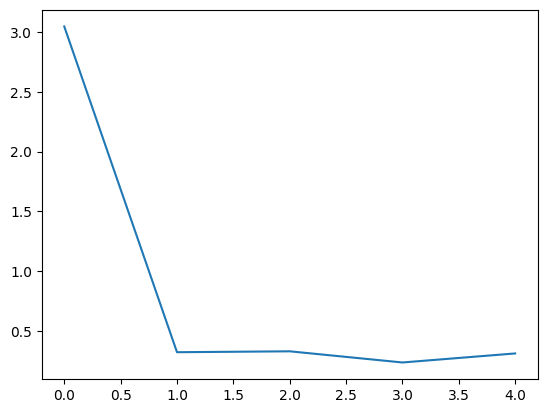

In [27]:
plt.plot(h.history["loss"])

In [28]:
model.evaluate(test_data)

125/125 [==============================] - 330s 3s/step - loss: 0.5488 - accuracy: 0.7933


[0.5488418936729431, 0.7932692170143127]

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np
pred = model.predict(test_data)

125/125 [==============================] - 15s 121ms/step


In [30]:
pred = np.argmax(pred,axis=1)

In [31]:
cm = confusion_matrix(test_data.classes,pred)

In [32]:
print(cm)

[[121 113]
 [ 16 374]]


In [33]:
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.7932692307692307
